## <span style='color:lightblue;'>การแบ่งส่วนภาพ (Thresholding) คืออะไร?</span>  
การแบ่งส่วนภาพ (Image Thresholding) เป็นเทคนิคที่ง่ายแต่มีประสิทธิภาพในการประมวลผลภาพและการมองเห็นด้วยคอมพิวเตอร์ ใช้เพื่อสร้างภาพไบนารี่ (ภาพขาวดำ) จากภาพสีเทาหรือภาพสี ความคิดพื้นฐานของการแบ่งส่วนภาพคือการแยกพิกเซลออกเป็นกลุ่มต่างๆ โดยอิงตามค่าความเข้มของสี เพื่อแยกแยะวัตถุหรือลักษณะเฉพาะในภาพ

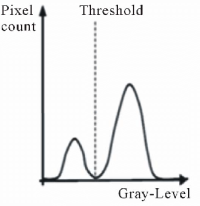  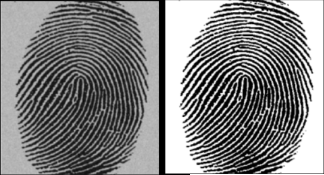

 **<span style='color:lightblue;'>วิธีการทำงานทั่วไป:</span>**

1. **<span style='color:lightgreen;'>การเลือกค่า Threshold:</span>**
    - เลือกค่า threshold ซึ่งเป็นระดับความเข้มของสีที่ใช้เป็นจุดตัดสิ่น

2. **<span style='color:lightgreen;'>การจำแนกพิกเซล:</span>**
    - เปรียบเทียบพิกเซลแต่ละตัวในภาพกับค่า threshold 
    - หากค่าความเข้มของสีของพิกเซลสูงกว่า threshold จะกำหนดให้เป็นค่าหนึ่ง (มักจะเป็นขาว หรือ '1') และถ้าต่ำกว่าจะกำหนดให้เป็นค่าอื่น (มักจะเป็นดำ หรือ '0')

3. **<span style='color:lightgreen;'>การสร้างภาพไบนารี่: </span>**
    - ผลลัพธ์จากกระบวนการนี้คือภาพตั้นฉบับจะถูกแปลงเป็นภาพไบนารี่ ซึ่งประกอบด้วยคู่ของค่าพิกเซล แทนพื้นหน้า (foreground) และพื้นหลัง (background)

**<span style='color:Tomato;'>มีวิธีการต่างๆ ในการแบ่งส่วนภาพ:</span>**

1. **<span style='color:orange;'>กรรมการแบ่งส่วนภาพแบบโลบัล (Global Thresholding): </span>**
    - ใช้ค่า threshold เดียวสำหรับภาพทั้งหมด วิธีนี้มีประสิทธิภาพเมื่อมีความแตกต่างของความเข้มระหว่างวัตถุที่สนใจแล้วพื้นหลัง

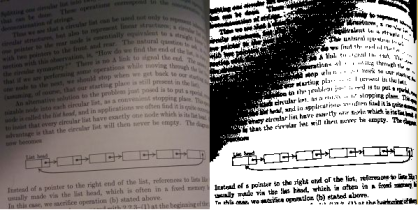

2. **<span style='color:orange;'>กรรมการแบ่งส่วนภาพแบบปรับตัว (Adaptive Thresholding):</span>**
    - ใช้ค่า threshold ที่แตกต่างกัน (Local Thresholding) สำหรับแต่ละพื้นที่ในภาพ วิธีนี้เป็นประโยชน์เมื่อเงื่อนไขการส่องสว่าง (lighting) แตกต่างกันในแต่ละส่วนของภาพ

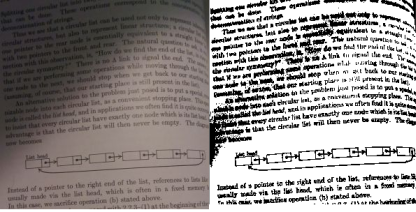

3. **<span style='color:orange;'>วิธี Intermean และ Otsu: </span>**
    - วิธีอัตโนมัติในการเลือกค่า threshold โดยเพิ่มความแปรปรวนระหว่างกลุ่มของพิกเซล

**<span style='color:Tomato;'>การแบ่งส่วนภาพ:</span>** ถูกใช้อย่างกว้างขวางในหลายด้าน เช่น การสแกนเอกสารและการประมวลผลเอกสาร การถ่ายภาพทางการแพทย์ (medical imaging) การมองเห็นด้วยเครื่องจักร การจดจำใบหน้า เป็นขั้นตอนพื้นฐานในไปบลายไลน์การประมวลผลภาพแล้วมีคุณค่าเนื่องจากการทำงานง่ายหรือคุณภาพของมัน

#### <span style='color:lightblue;'>การแบ่งส่วนภาพด้วยค่า Threshold ที่กำหนดไว้แล้ว</span>  
1. **<span style='color:lightgreen;'>นำเข้าไลบรารี่</span>**
    - นำเข้าไลบรารี่ที่จำเป็นสำหรับการประมวลผลภาพ

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

2. **<span style='color:lightgreen;'>อ่านภาพ</span>**
    - โหลดภาพโดยใช้ OpenCV

In [3]:
img = cv2.imread('./images/bank4.jpg', 0)
print(type(img))

<class 'numpy.ndarray'>


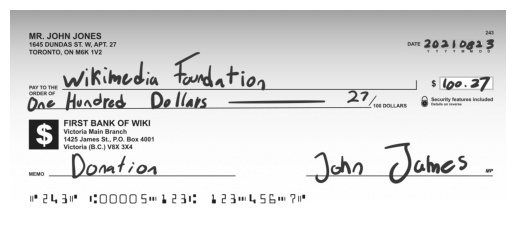

In [4]:
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

3. **<span style='color:lightgreen;'>คำนวณฮิสโตแกรมโดยใช้ไลบรารี่ cv2</span>**
    - คำนวณฮิสโตแกรมของภาพ

In [7]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
print(hist[5,0]) # แสดงค่าความถี่ของ intensity ที่มีค่า 5 จำนวน 1 pixel

1.0


4. **<span style='color:lightgreen;'>วาดกราฟฮิสโตแกรม</span>**
    - ใช้ Matplotlib เพื่อแสดงฮิสโตแกรม

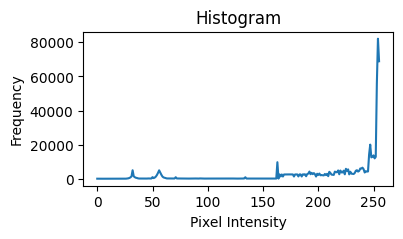

In [8]:
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('histogram.png')

5. **<span style='color:lightgreen;'>ใช้ Threshold ด้วยค่าคงที่ที่ผ่านไลบรารี่ cv2</span>**
    - เลือกค่า threshold บนพื้นฐานของฮิสโตแกรม แล้วใช้การแบ่งส่วนภาพ

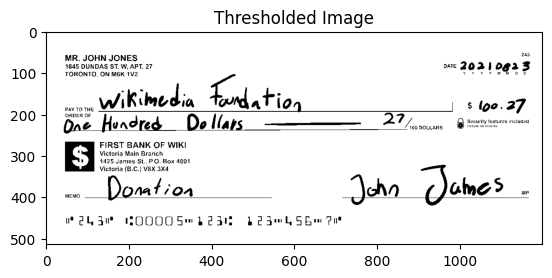

In [10]:
thresh = 100

# ret คือ ค่าที่ใช้ในการแบ่ง threshold
# bin_img คือ ภาพที่ได้หลังจากการ thresholding
ret, bin_img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 

plt.imshow(bin_img, cmap='gray')
plt.title('Thresholded Image')
plt.show()


In [11]:
print(f'Threshold used: {ret}')
print(f'Unique values in binary image: {np.unique(bin_img)}')

Threshold used: 100.0
Unique values in binary image: [  0 255]


# วิธีการเขียนมือของ Thresholding

## เขียนแบบย่อ If

6. **<span style='color:lightgreen;'>ใช้ Threshold ด้วยค่าคงที่</span>**
    - เลือกค่า threshold บนพื้นฐานของฮิสโตแกรม แล้วใช้การแบ่งส่วนภาพ

## ทำ Threshold เอง

```py
thresh = 100
bimg = np.zeros_like(img, dtype='uint8')
x = img > 100
bimg[x] = 255 #ตำแหน่งไหนที่ img มีค่ามากกว่า 100 ให้ค่า 255


print(x)
#output
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
```

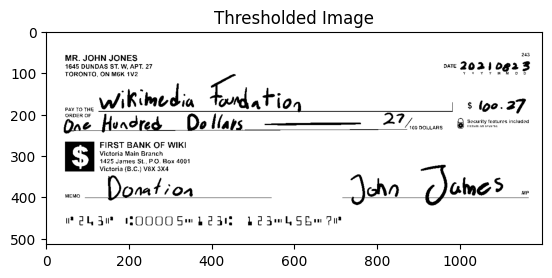

In [ ]:
thresh = 100
bimg = np.zeros_like(img, dtype='uint8')
bimg[img>=thresh] = 255  # ถ้าเป็นจริงจะเป็นขาว (255)
plt.imshow(bimg, cmap='gray')
plt.title('Thresholded Image')
plt.show()


## เขียนแบบ loop

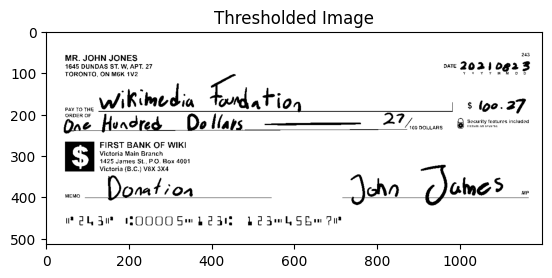

In [ ]:
thresh = 100                          # ตั้งค่า threshold = 100
out = np.zeros_like(img, dtype='uint8')  # สร้างภาพเปล่า (ดำทั้งหมด)
row, col = img.shape                  # ได้ขนาดภาพ (จำนวนแถว, คอลัมน์)

for i in range(row):                  # วนลูปแต่ละแถว
    for j in range(col):              # วนลูปแต่ละคอลัมน์
        if img[i,j] >= thresh:        # ถ้าค่า pixel ≥ 100
            out[i,j] = 255            # ให้เป็นขาว (255)
                                      # ถ้า < 100 ยังคงเป็นดำ (0)

plt.imshow(out, cmap='gray')          # แสดงภาพ
plt.title('Thresholded Image')
plt.show()